<a href="https://colab.research.google.com/github/ashwinram472/S-P-500-TimeSeries/blob/master/Apple_Stock_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [0]:
df = web.DataReader('AAPL' , data_source = 'yahoo' , start ='2012-01-01' , end = '2019-12-19')

In [7]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970


In [11]:
df.shape

(2005, 6)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Date')

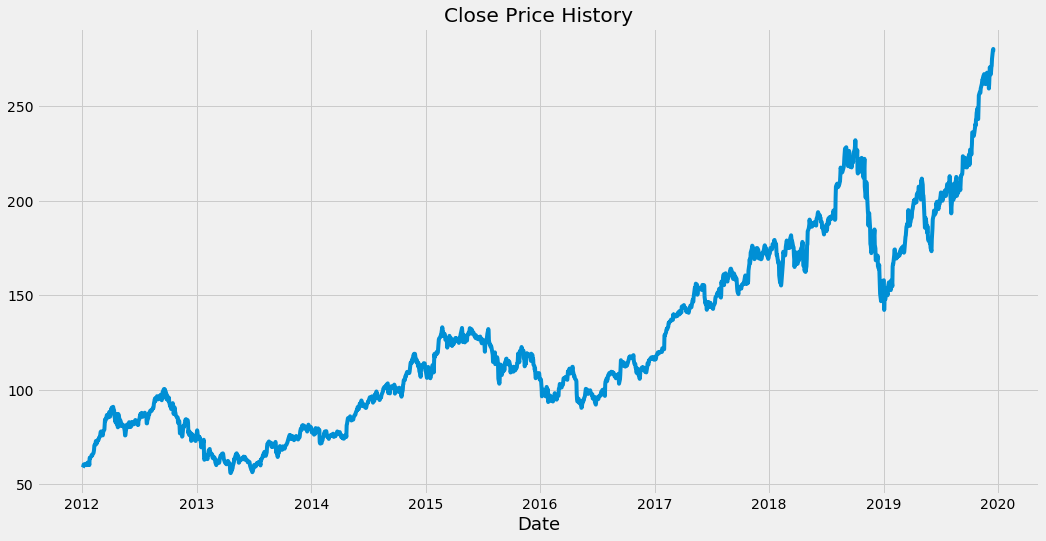

In [12]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize = 18)

In [16]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) *.8)
trainging_data_len

1604

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [21]:
train_data = scaled_data[0:trainging_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0 ])
  y_train.append(train_data[i , 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [0]:
x_train , y_train = np.array(x_train) , np.array(y_train)

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1] , 1))

In [26]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape = (x_train.shape[1] , 1)))
model.add(LSTM(50 , return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [27]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')

In [28]:
model.fit(x_train,y_train , batch_size=1, epochs = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1544/1544 [==============================] - 322s 209ms/step - loss: 8.1848e-04


In [0]:
test_data = scaled_data[trainging_data_len - 60 : , : ]
x_test = []
y_test = scaled_data[trainging_data_len: , :]

for i in range(60 , len(test_data)):
  x_test.append(test_data[i-60 : i,0])

In [0]:
x_test = np.array(x_test)
x_test = np.reshape(x_test , (x_test.shape[0],x_test.shape[1] , 1))

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
rmse = np.sqrt(np.mean (predictions - y_test) **2)

In [54]:
rmse

198.44689587831544

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


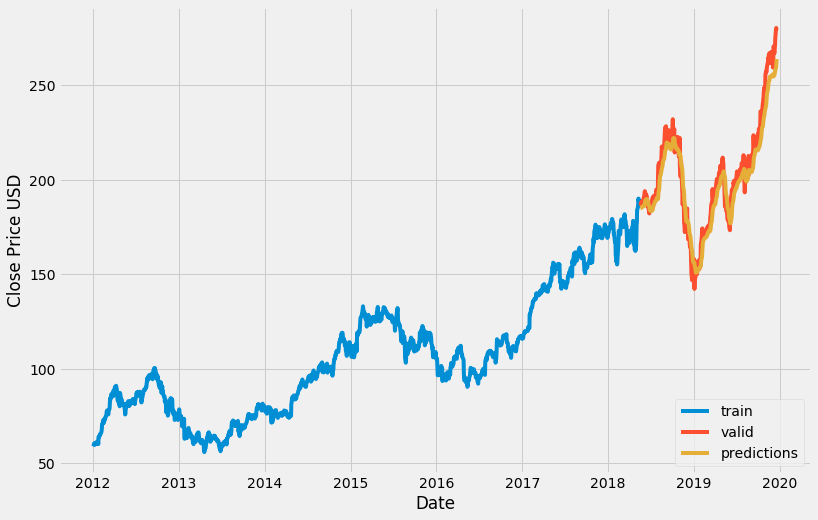

In [62]:
plt.figure(figsize=(12,8))
train = data[:trainging_data_len]
valid = data[trainging_data_len:]
valid['Predictions'] = predictions
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['train' , 'valid' ,'predictions'] ,loc = 'lower right')
plt.show()

In [63]:
valid

,Close,Predictions
Date,,
2018-05-18,186.309998,184.883118
2018-05-21,187.630005,184.999741
2018-05-22,187.160004,185.157684
2018-05-23,188.360001,185.255417
2018-05-24,188.149994,185.458557
...,...,...
2019-12-13,275.149994,258.131012
2019-12-16,279.859985,259.264984
2019-12-17,280.410004,260.895660


In [0]:
apple_quote = web.DataReader('AAPL' , data_source='yahoo' , start = '2012-01-01' , end = '2019-12-19')

In [72]:
new_df  = apple_quote.filter(['Close'])
last_60days = new_df[-60:].values
last_60days = scaler.transform(last_60days)
X_test = []

X_test.append(last_60days)
X_test=np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[265.08038]]


In [0]:
#predicting the price for the next day
apple_quote2 = web.DataReader('AAPL' , data_source='yahoo' , start = '2019-12-20' , end = '2019-12-20')

In [75]:
apple_quote2['Close']

Date
2019-12-20    279.440002
Name: Close, dtype: float64